In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(seed=0)
X_min=0
X_max=2.5
X_n=30
X_col=['cornflowerblue','gray']
X=np.zeros(X_n)
T=np.zeros(X_n,dtype=np.uint8)
Dist_s=[0.4,0.8]
Dist_w=[0.8,1.6]
Pi=0.5
for n in range(X_n):
    wk=np.random.rand()
    T[n]=0*(wk<Pi)+1*(wk>=Pi)
    X[n]=np.random.rand()*Dist_w[T[n]]+Dist_s[T[n]]
np.savez('ch6.npz',X=X,X_max=X_max,X_min=X_min,X_n=X_n,X_col=X_col,T=T,Dist_s=Dist_s,Dist_w=Dist_w,Pi=Pi)   
print(np.round(X,2))
print(T)

[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


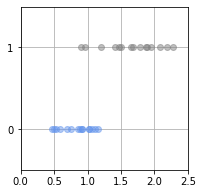

In [3]:
def show_data1(x,t):
    K=np.max(t)+1
    for k in range(K):
        plt.plot(x[t==k],t[t==k],X_col[k],alpha=0.5,linestyle='None',marker='o')
        plt.grid(True)
        plt.ylim(-.5,1.5)
        plt.xlim(X_min,X_max)
        plt.yticks([0,1])
fig=plt.figure(figsize=(3,3))
show_data1(X,T)
plt.show()

1.25

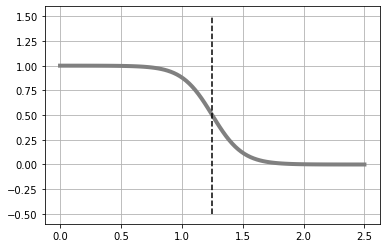

In [4]:
def logistic(x,w):
    y=1/(1+np.exp(-(w[0]*x+w[1])))
    return y
def show_logistic(w):
         xb=np.linspace(X_min,X_max,100)
         y=logistic(xb,w)
         plt.plot(xb,y,color='grey',linewidth=4)
         i=np.min(np.where(y>0.5))
         B=(xb[i-1]+xb[i])/2
         plt.plot([B,B],[-.5,1.5],color='k',linestyle='--')
         plt.grid(True)
         return B
W=[-8,10]
show_logistic(W)

In [5]:
def cee_logistic(w,x,t):
    y=logistic(x,w)
    cee=0
    for n in range(len(y)):
        cee=cee-(t[n]*np.log(y[n])+(1-t[n])*np.log(1-y[n]))
    cee=cee/X_n
    return cee
W=[1,1]
cee_logistic(W,X,T)

1.0288191541851066

In [6]:
from mpl_toolkits.mplot3d import Axes3D

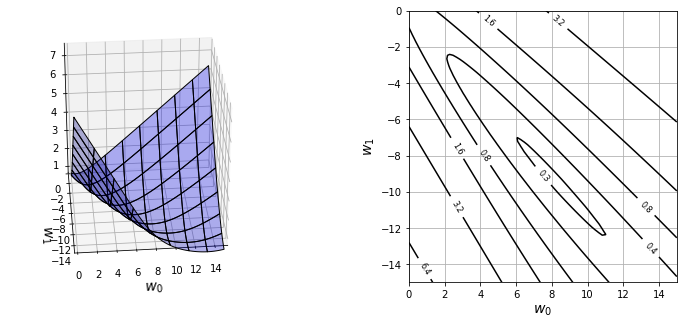

In [7]:
xn=80
w_range=np.array([[0,15],[-15,0]])
x0=np.linspace(w_range[0,0],w_range[0,1],xn)
x1=np.linspace(w_range[1,0],w_range[1,1],xn)
xx0,xx1=np.meshgrid(x0,x1)
C=np.zeros((len(x1),len(x0)))
w=np.zeros(2)
for i0 in range(xn):
    for i1 in range(xn):
        w[0]=x0[i0]
        w[1]=x1[i1]
        C[i1,i0]=cee_logistic(w,X,T)
plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace=0.5)
ax=plt.subplot(1,2,1,projection='3d')
ax.plot_surface(xx0,xx1,C,color='blue',edgecolor='black',rstride=10,cstride=10,alpha=0.3)
ax.set_xlabel('$w_0$',fontsize=14)
ax.set_ylabel('$w_1$',fontsize=14)
ax.set_xlim(0,15)
ax.set_ylim(-15,0)
ax.set_zlim(0.8)
ax.view_init(30,-95)

plt.subplot(1,2,2)
cont=plt.contour(xx0,xx1,C,20,colors='black',levels=[0.26,0.4,0.8,1.6,3.2,6.4])
cont.clabel(fmt="%1.1f",fontsize=8)
plt.xlabel('$w_0$',fontsize=14)
plt.ylabel('$w_1$',fontsize=14)
plt.grid(True)
plt.show()


In [10]:
def dcee_logistic(w,x,t):
    y=logistic(x,w)
    dcee=np.zeros(2)
    for n in range(len(y)):
        dcee[0]=dcee[0]+(y[n]-t[n])*x[n]
        dcee[1]=dcee[1]+(y[n]-t[n])
    dcee=dcee/X_n
    return dcee


w0=8.17,w1=-9.38
CEE=0.25
Boundary=1.15g


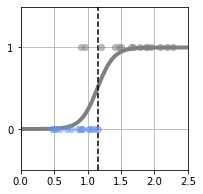

In [17]:
from scipy.optimize import minimize

def fit_logistic(w_init,x,t):
    res1=minimize(cee_logistic,w_init,args=(x,t),jac=dcee_logistic,method="CG")
    return res1.x

plt.figure(1,figsize=(3,3))
W_init=[-1,1]
W=fit_logistic(W_init,X,T)
print("w0={0:.2f},w1={1:.2f}".format(W[0],W[1]))
B=show_logistic(W)
show_data1(X,T)
plt.ylim(-.5,1.5)
plt.xlim(X_min,X_max)
cee=cee_logistic(W,X,T)
print('CEE={0:.2f}'.format(cee))
print("Boundary={0:.2f}g".format(B))
plt.show()

In [21]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
np.random.seed(seed=1)  # 난수를 고정
N = 100 # 데이터의 수
K = 3 # 분포 수
T3 = np.zeros((N, 3), dtype=np.uint8)
T2 = np.zeros((N, 2), dtype=np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3] # X0 범위 표시 용
X_range1 = [-3, 3] # X1의 범위 표시 용
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) # 분포의 중심
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) # 분포의 분산
Pi = np.array([0.4, 0.8, 1]) # (A) 각 분포에 대한 비율 0.4 0.8 1
for n in range(N):
    wk = np.random.rand()
    for k in range(K): # (B)
        if wk < Pi[k]:
            T3[n, k] = 1
            break
    for k in range(2):
        X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k]
                   + Mu[T3[n, :] == 1, k])
T2[:, 0] = T3[:, 0]
T2[:, 1] = T3[:, 1] | T3[:, 2]

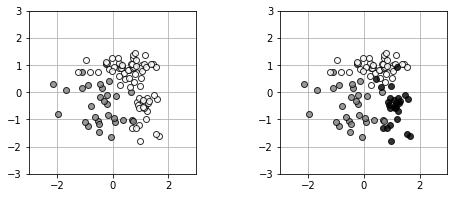

In [31]:
def show_data2(x,t):
    wk,K=t.shape
    c=[[.5,.5,.5],[1,1,1],[0,0,0]]
    for k in range(K):
        plt.plot(x[t[:,k]==1,0],x[t[:,k]==1,1],linestyle="None",markeredgecolor='black',marker='o',color=c[k],alpha=0.8)
        plt.grid(True)
    
plt.figure(figsize=(7.5, 3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
show_data2(X, T2)
plt.xlim(X_range0)
plt.ylim(X_range1)


plt.subplot(1, 2, 2)
show_data2(X, T3)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()